In [1]:
1+1

2

In [39]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [40]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))

[[0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 1.2000e+01 1.3000e+01
  3.5000e+01 6.4000e+01 1.0000e+02 1.5300e+02 1.9500e+02 2.8200e+02
  3.2700e+02 4.4300e+02 5.1600e+02 6.2300e+02 6.7800e+02 7.7000e+02
  8.4000e+02 9.4400e+02 1.0420e+03 1.0830e+03 1.1940e+03 1.2520e+03
  1.3690e+03 1.5120e+03 1.7180e+03 1.9190e+03 2.0310e+03 2.3010e+03
  2.5380e+03 2.8340e+03 3.2610e+03 3.4860e+03 3.6960e+03 3.9740e+03
  4.0860e+03 4.1210e+03 4.2810e+03 4.0800e+03 4.1590e+03 3.9310e+03
  3.9740e+03 3.8700e+03 3.9150e+03 3.8470e+03 3.8790e+03 3.8560e+03
  3.8900e+03 3.9470e+03 3.9980e+03 4.0730e+03 4.0210e+03 4.1280e+03
  4.2770e+03 4.2030e+03 4.3180e+03 4.2160e+03 4.1880e+03 4.0540e+03
  4.1190e+03 3.9770e+03 3.9350e+03 3.7890e+03 3.8090e+03 3.7440e+03
  3.6720e+03 3.5050e+03 3.6280e+03 3.4140e+03 3.4000e+03 3.3060e+03
  3.3830e+03 3.3440e+03 3.2560e+03 3.1610e+03 3.0840e+03 3.1770e+03
  3.1160e+03 3.1110e+03 3.0820e+03 3.0100e+03 2.9200e+03 2.9140e+03
  2.8690e+03 2.8590e+03 2.8510e+03 2.6890e+03 2.

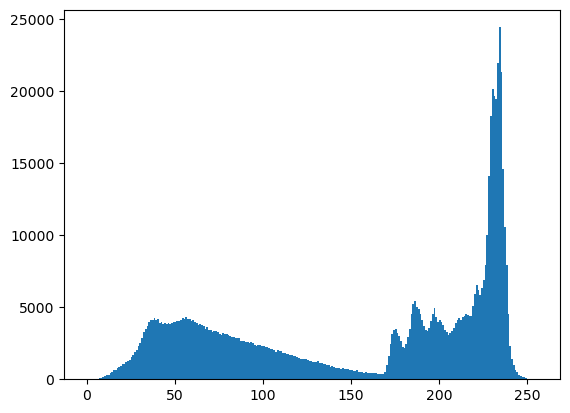

In [41]:
hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

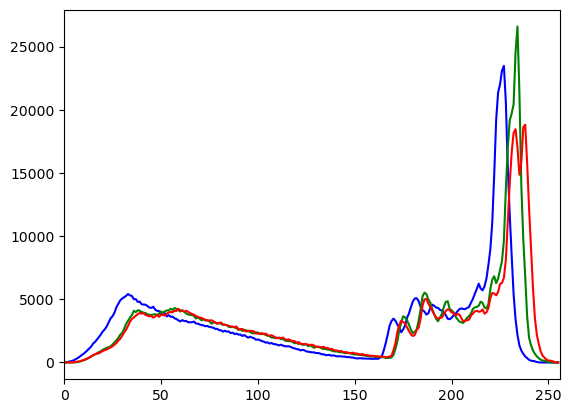

In [42]:
img = cv2.imread('./sunset-5163192_960_720.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


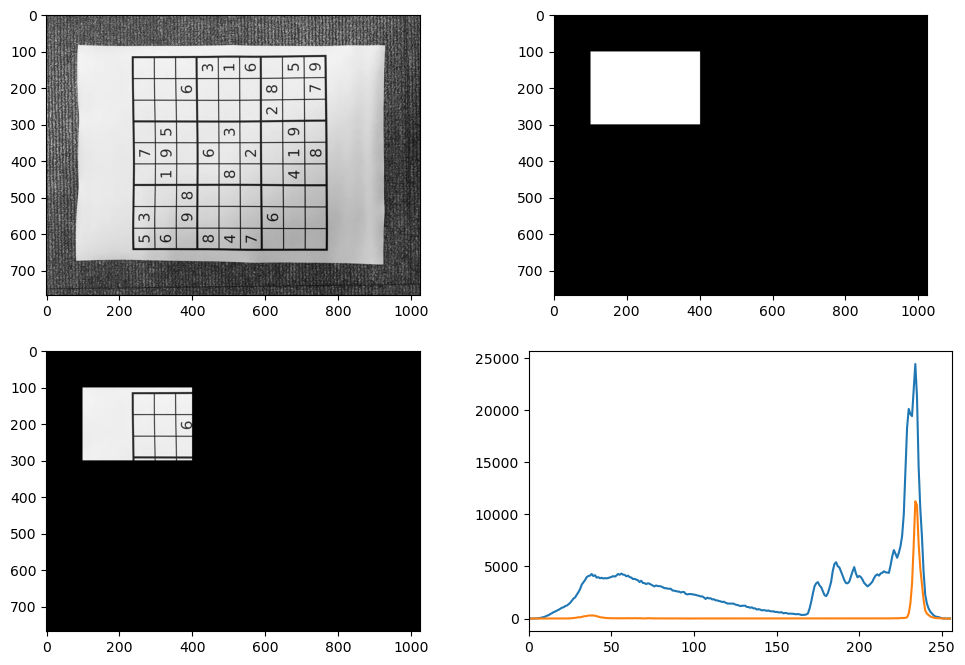

In [43]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


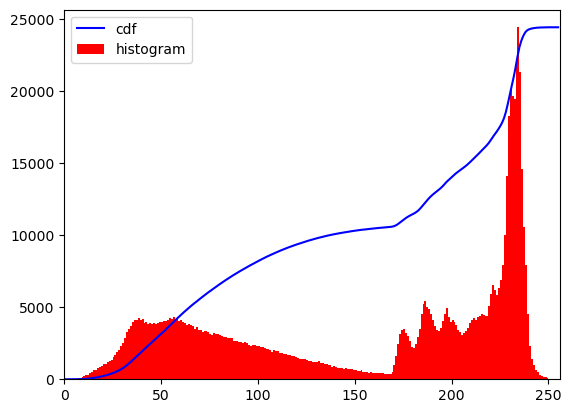

In [44]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [98]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [99]:
img = cv2.imread('mario.png',0) #mario
img2 = img.copy()
template = cv2.imread('template.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

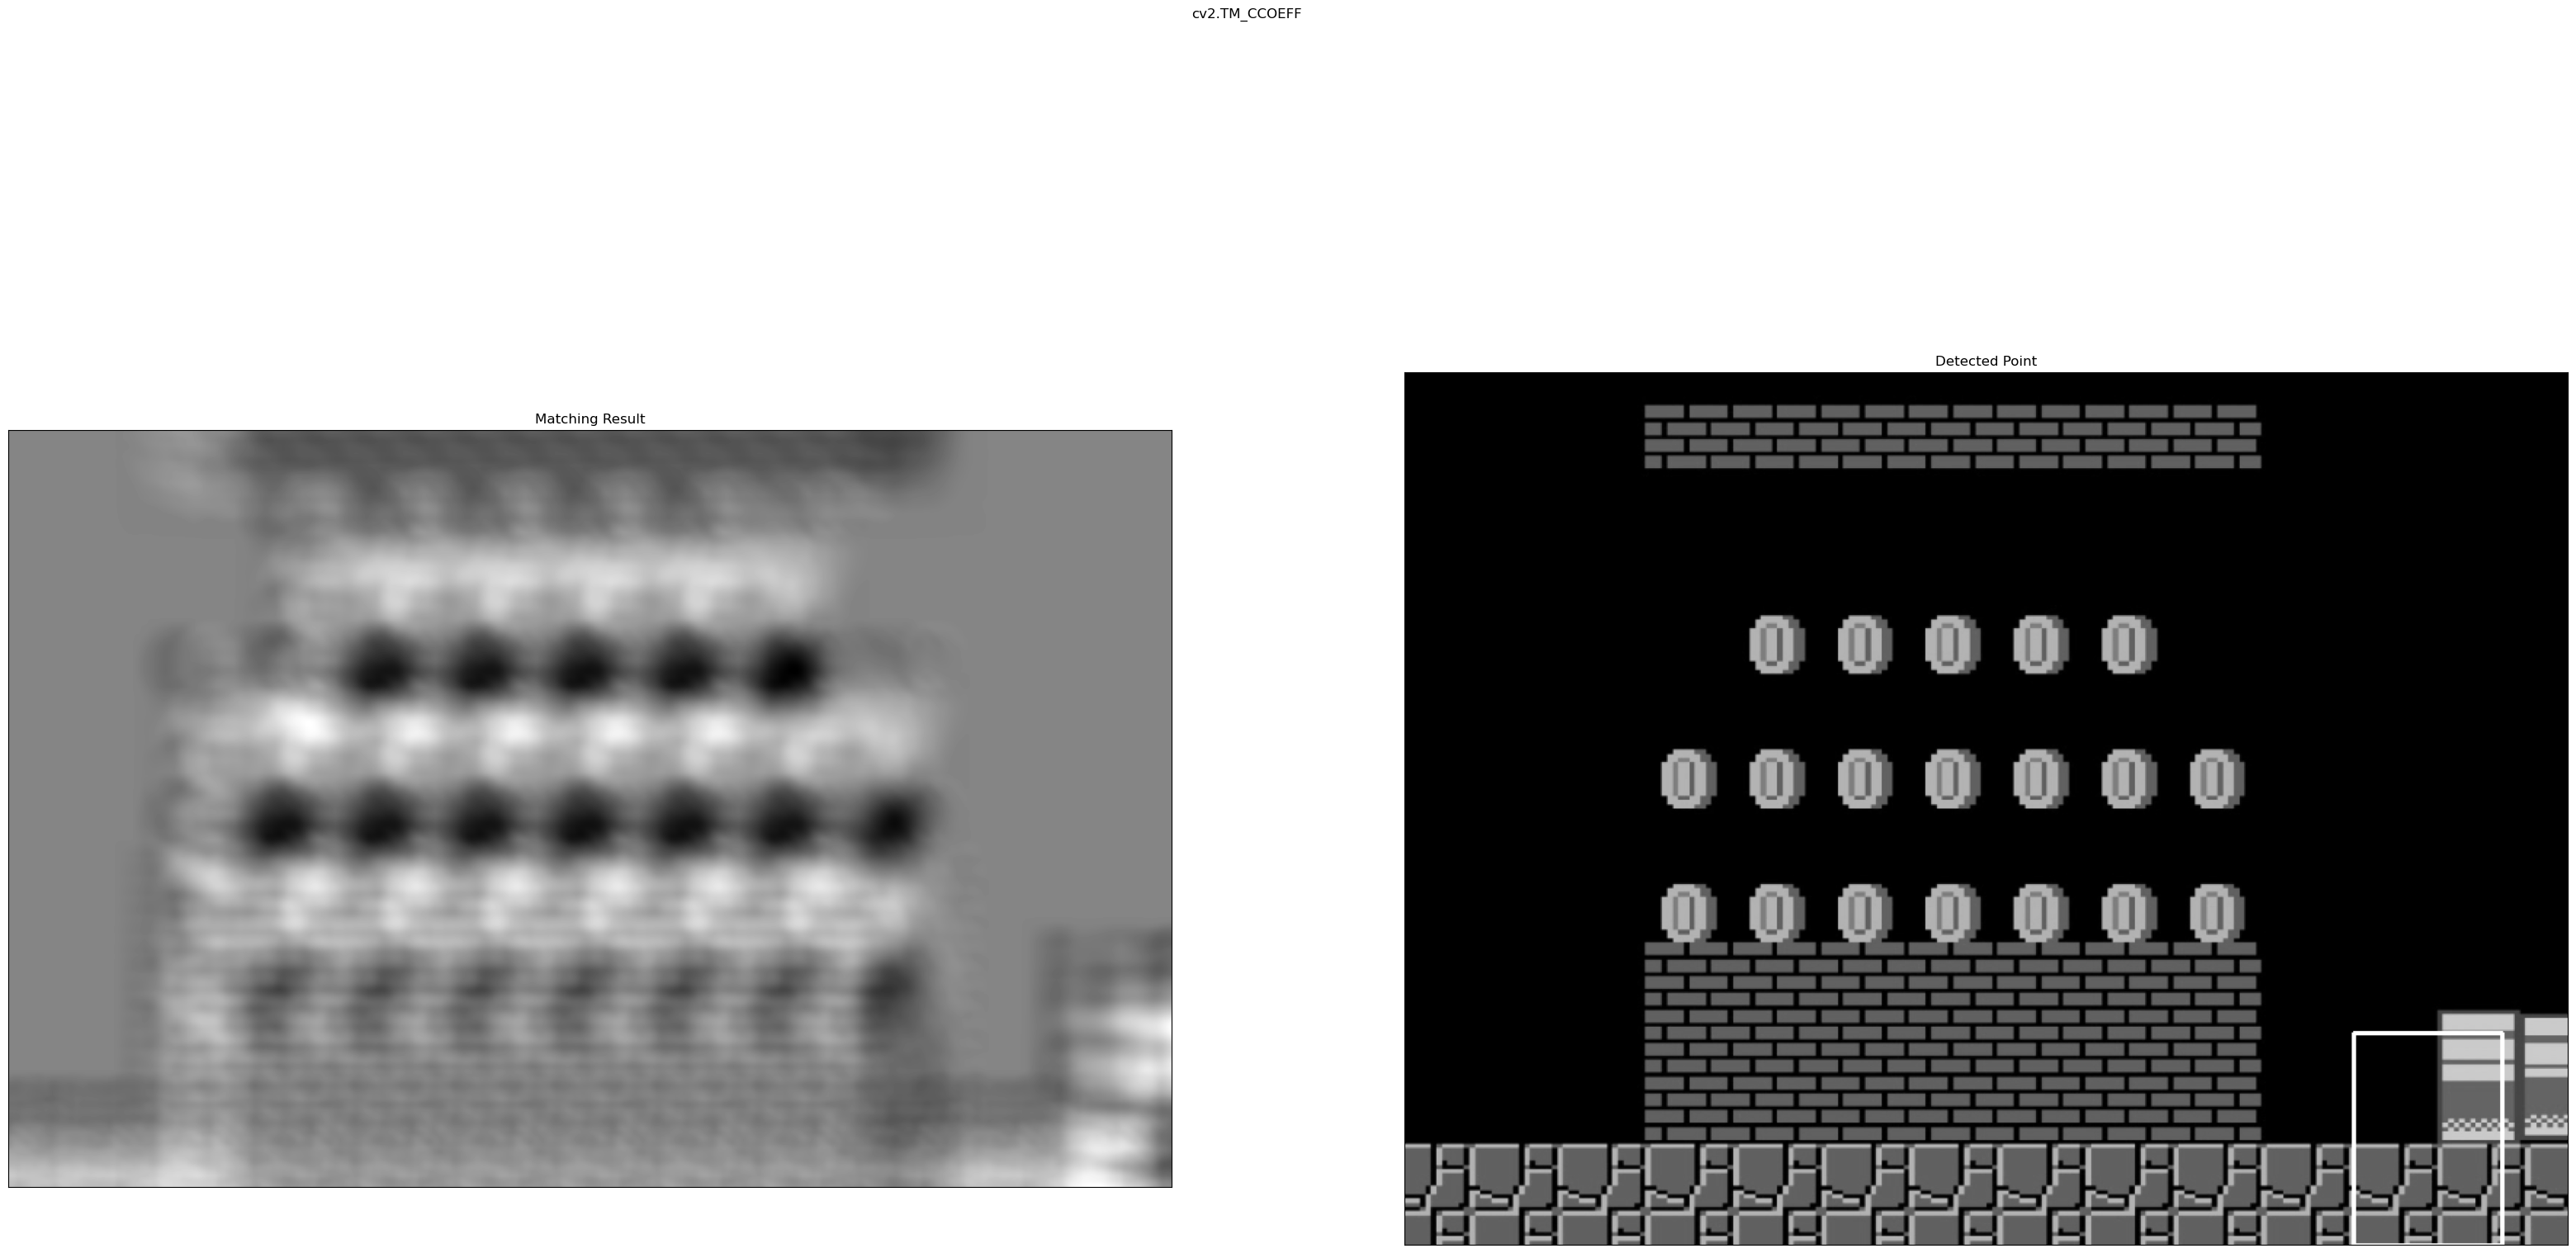

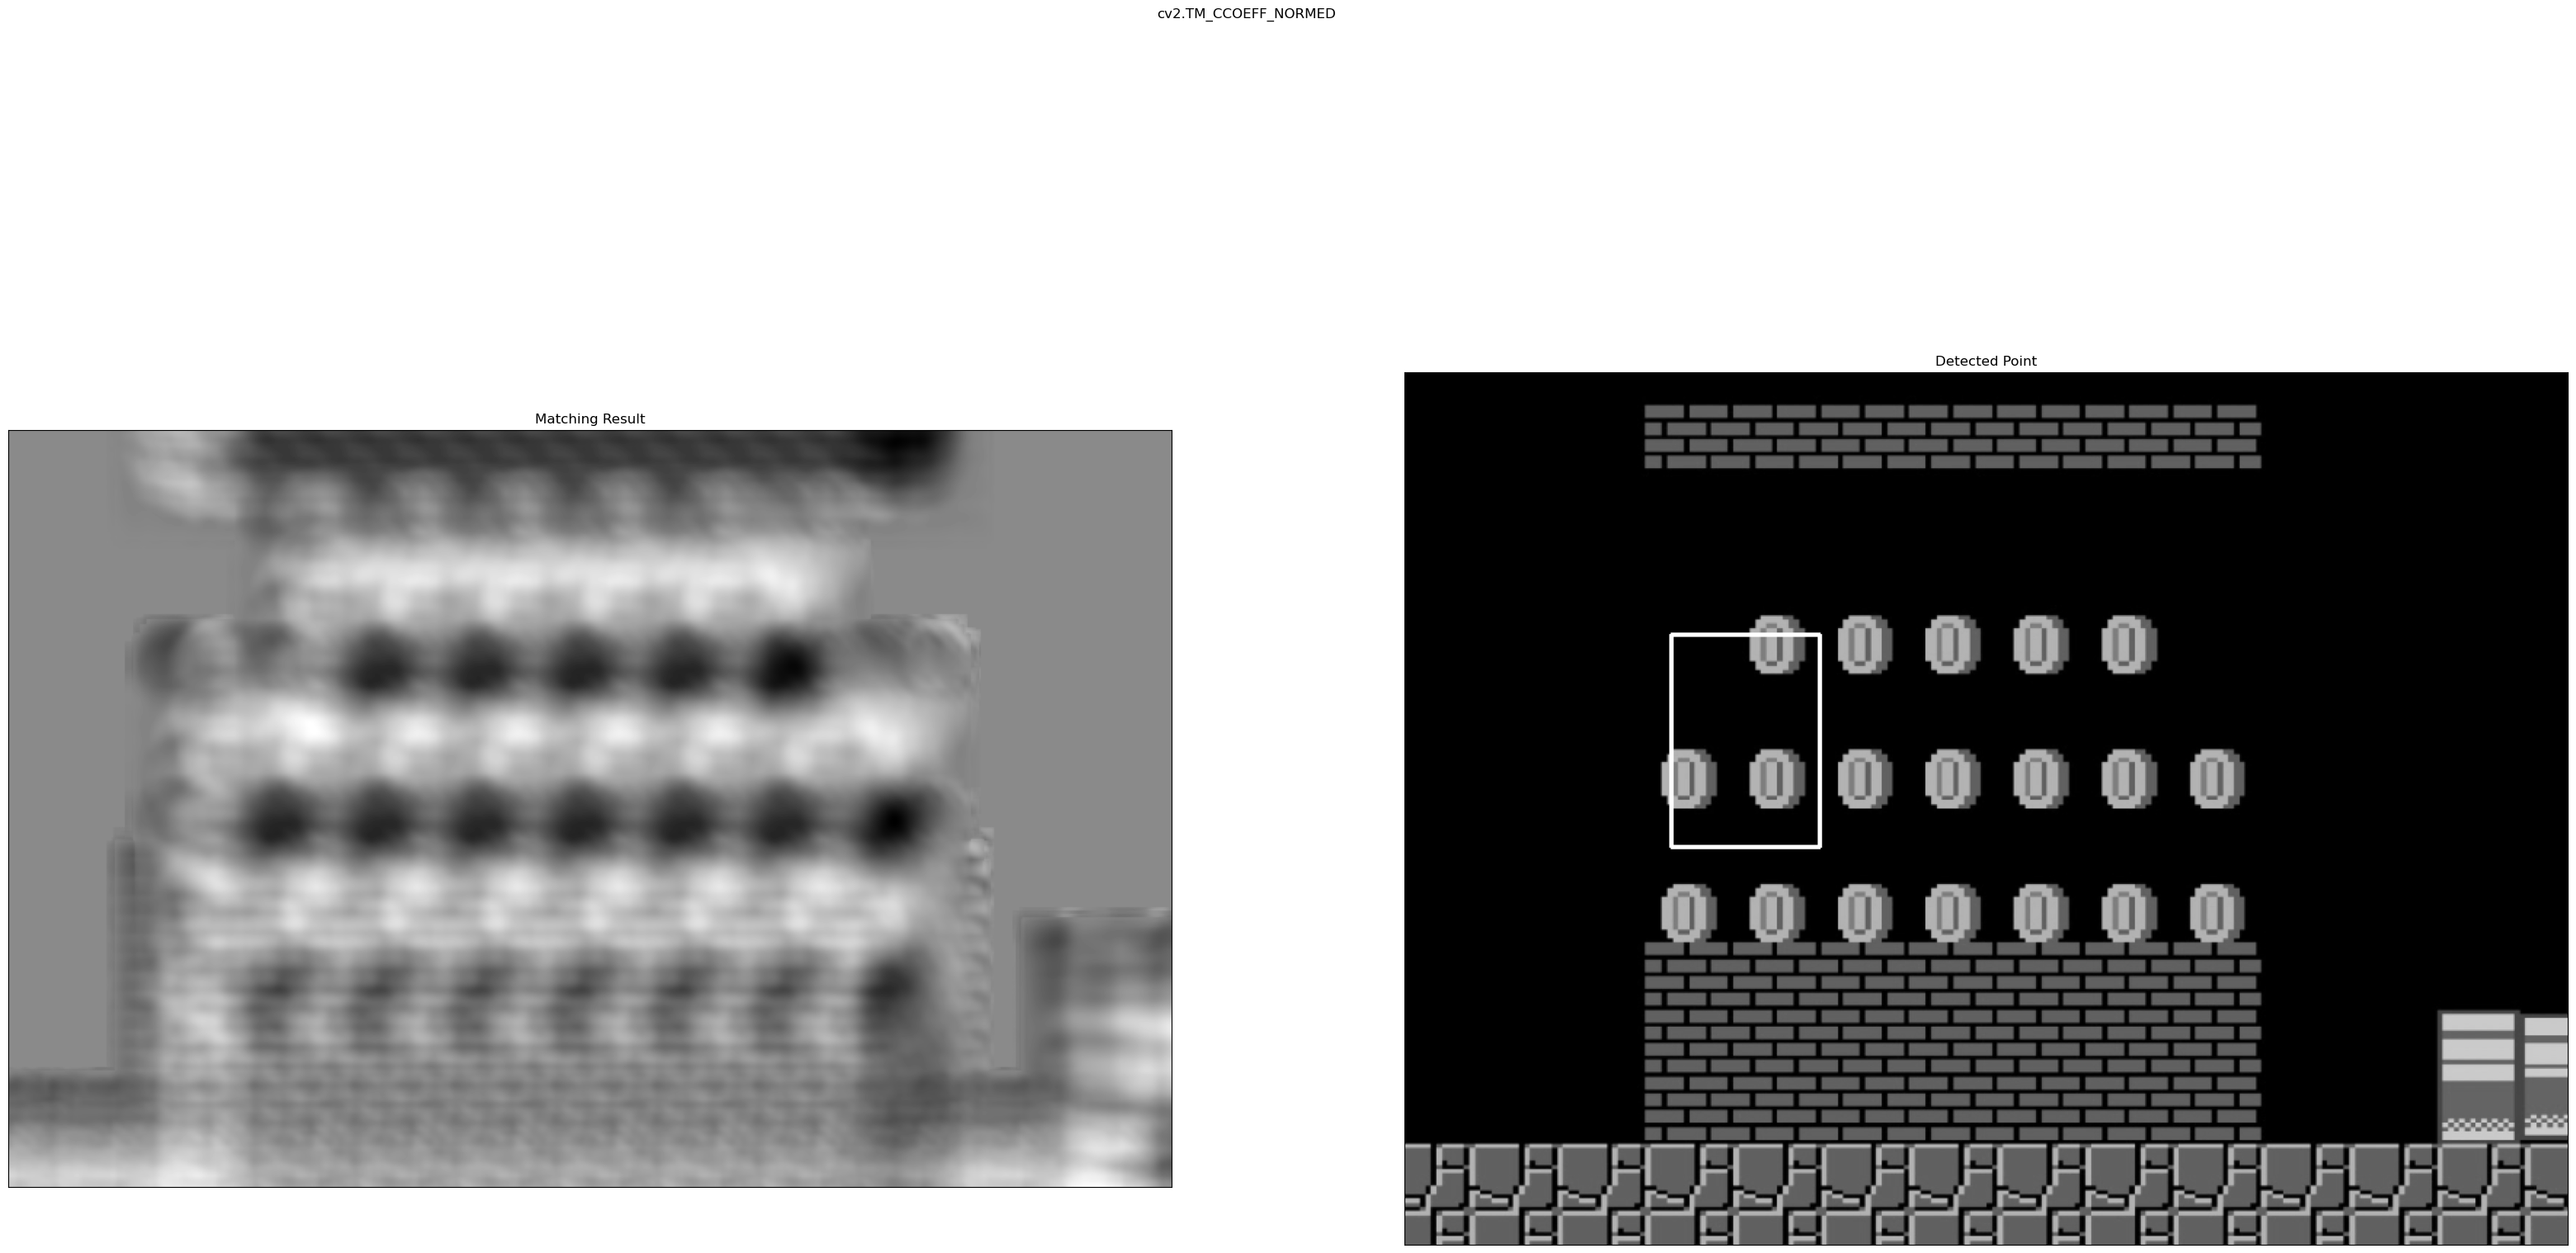

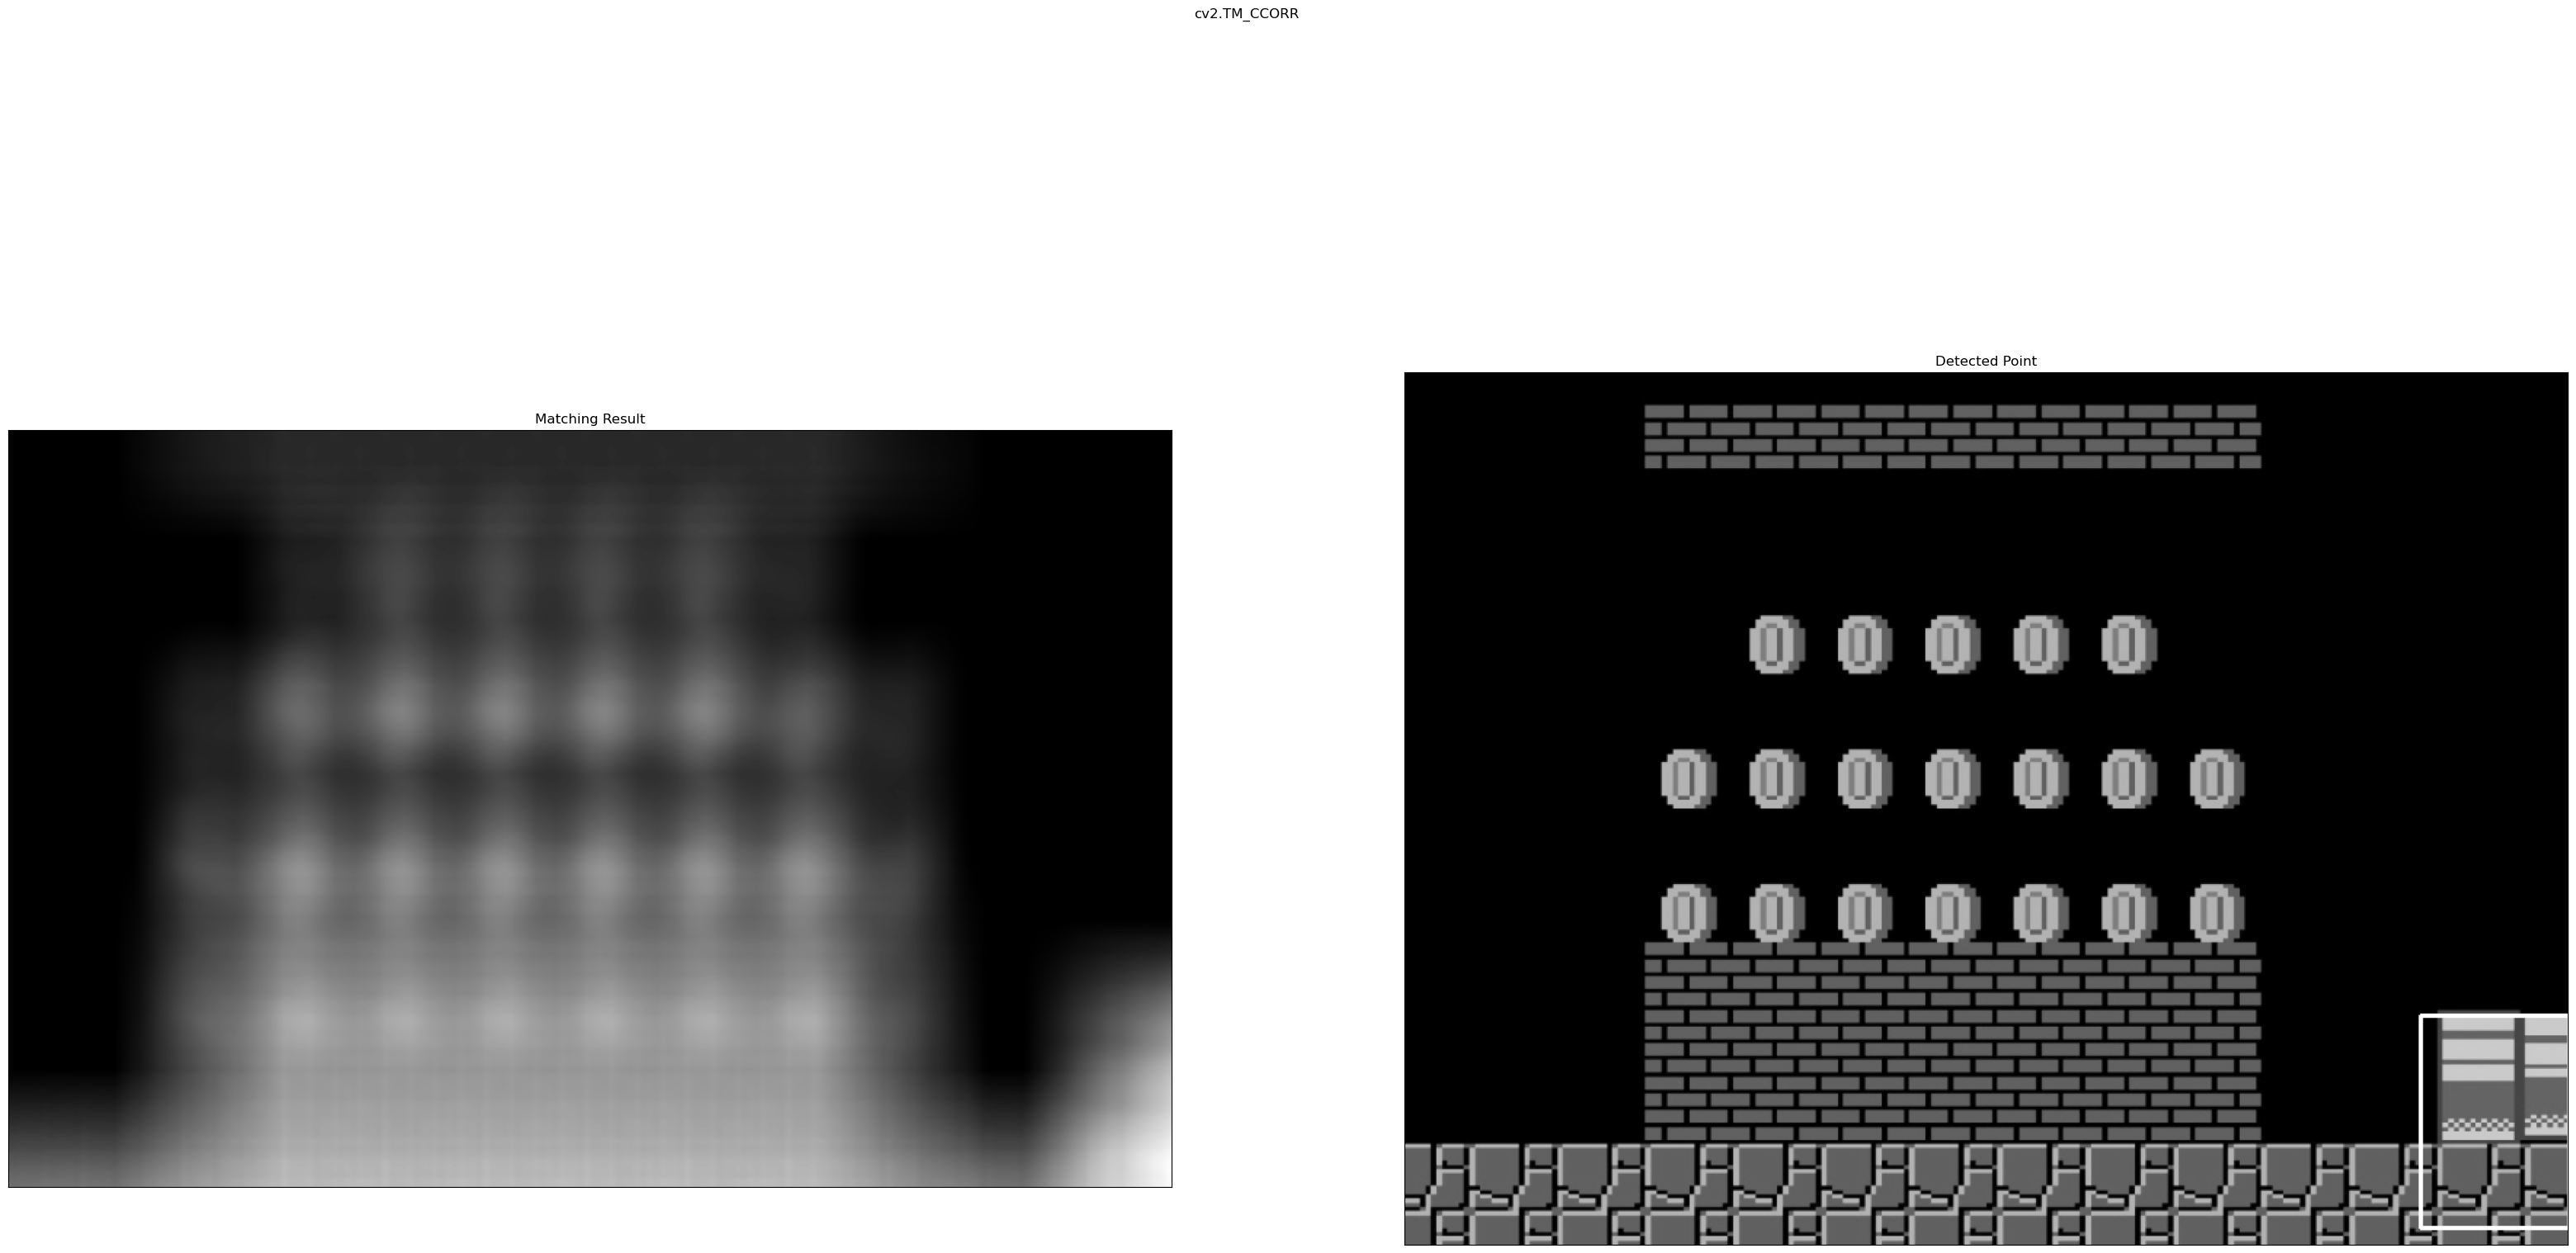

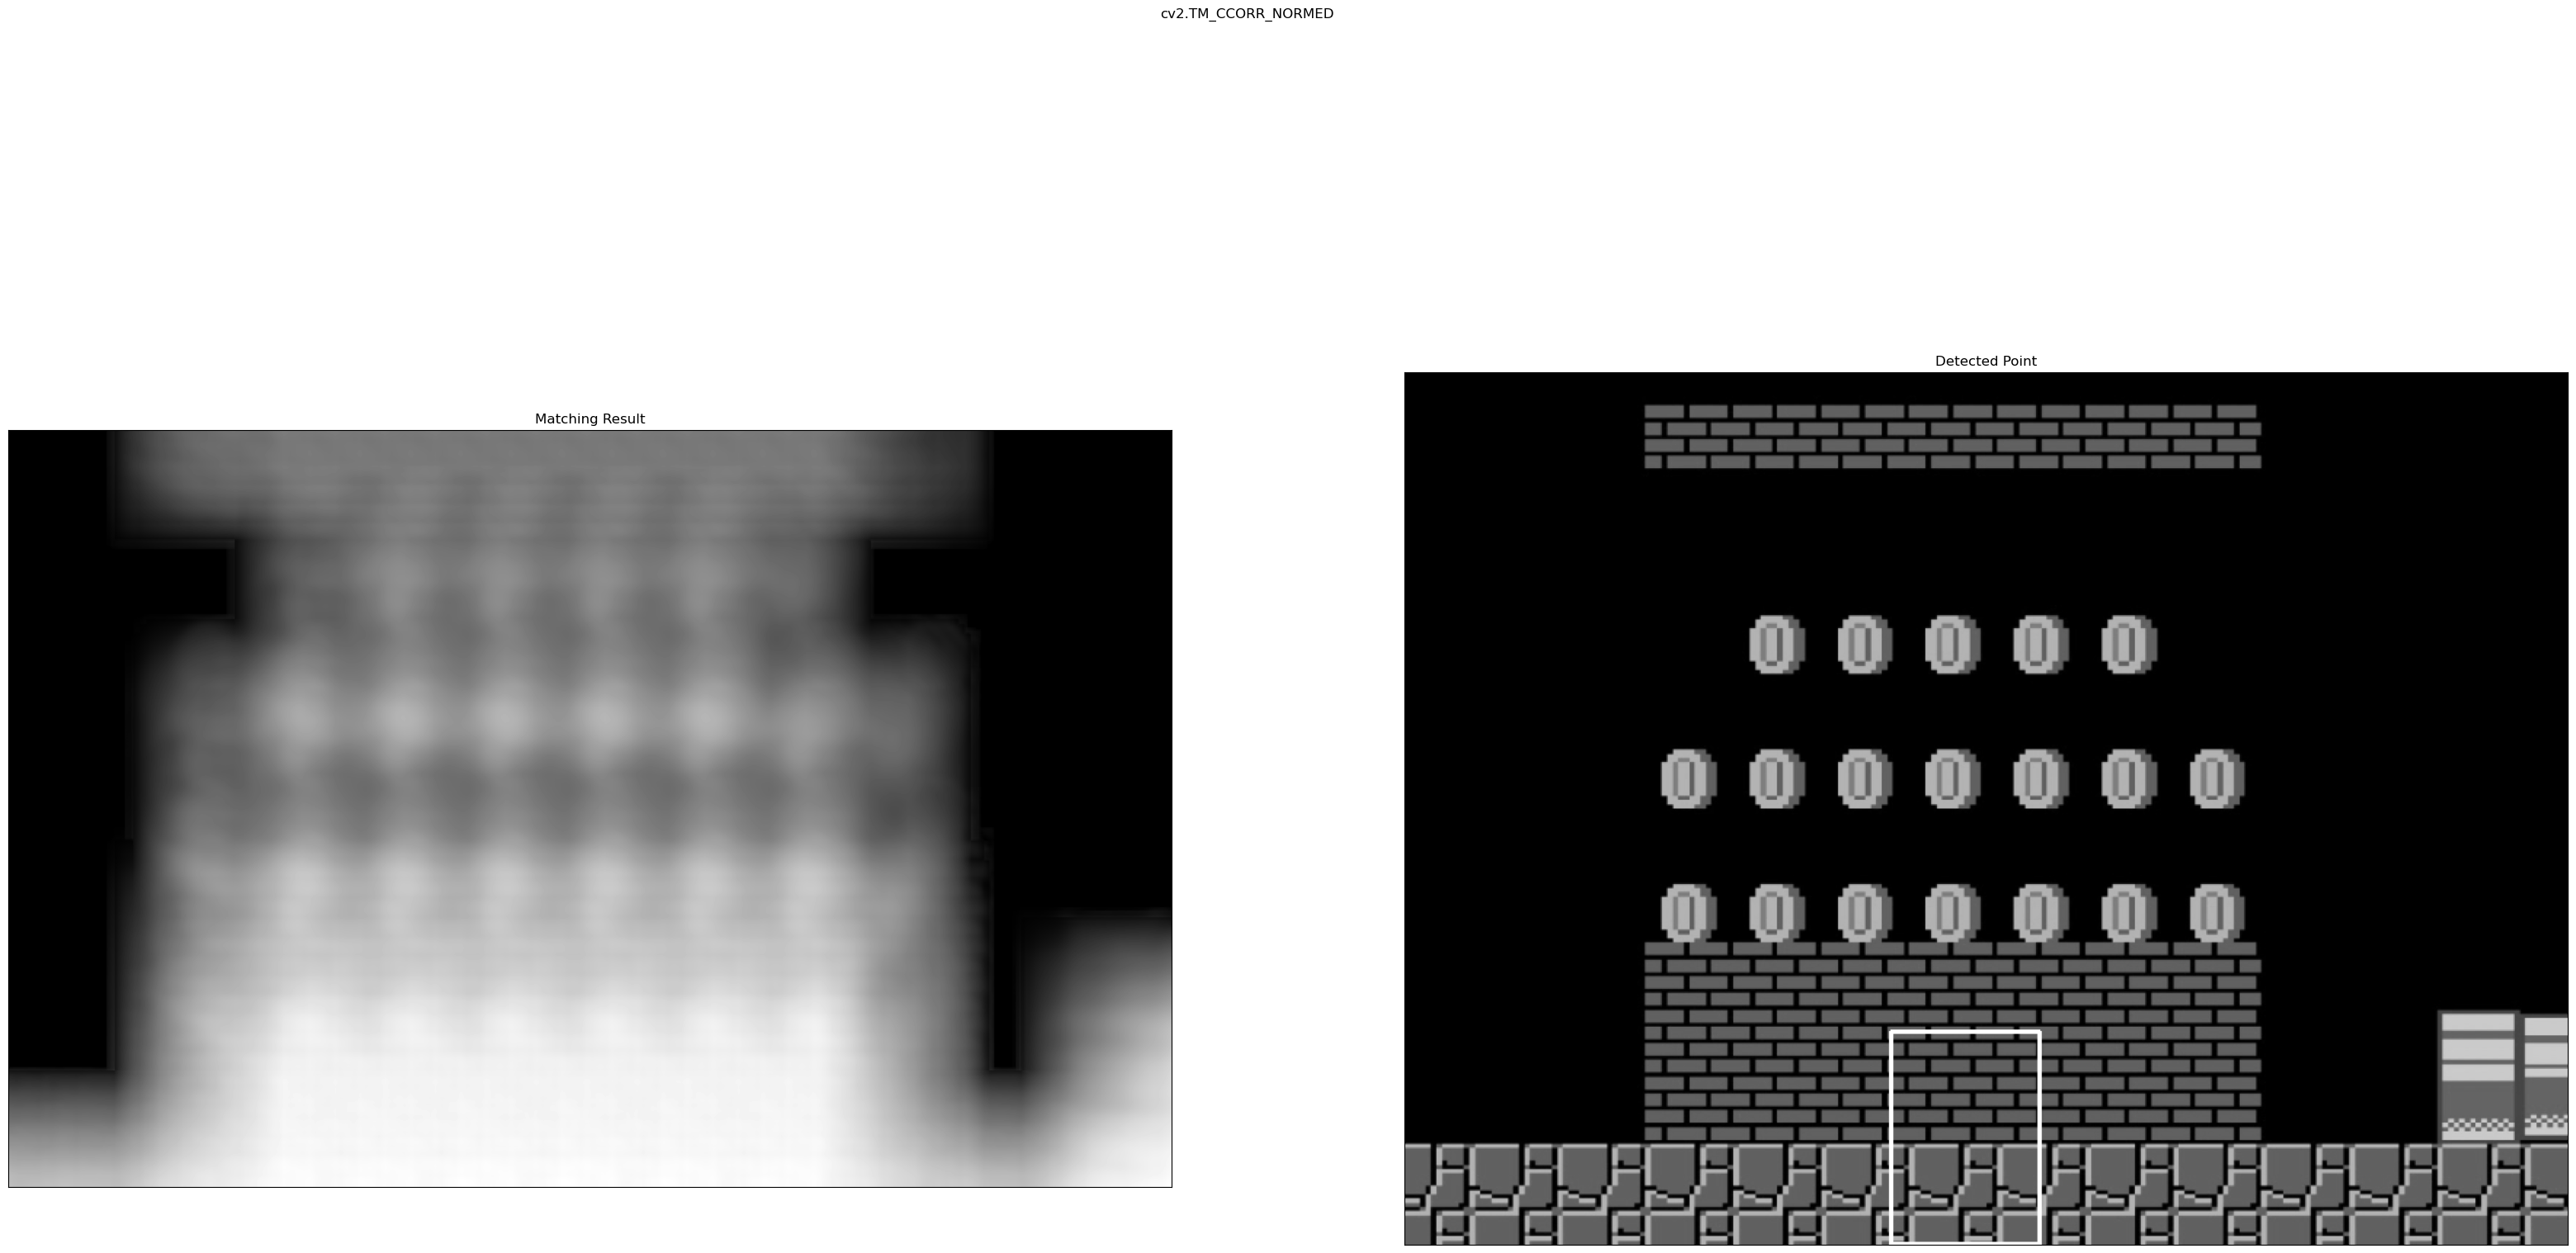

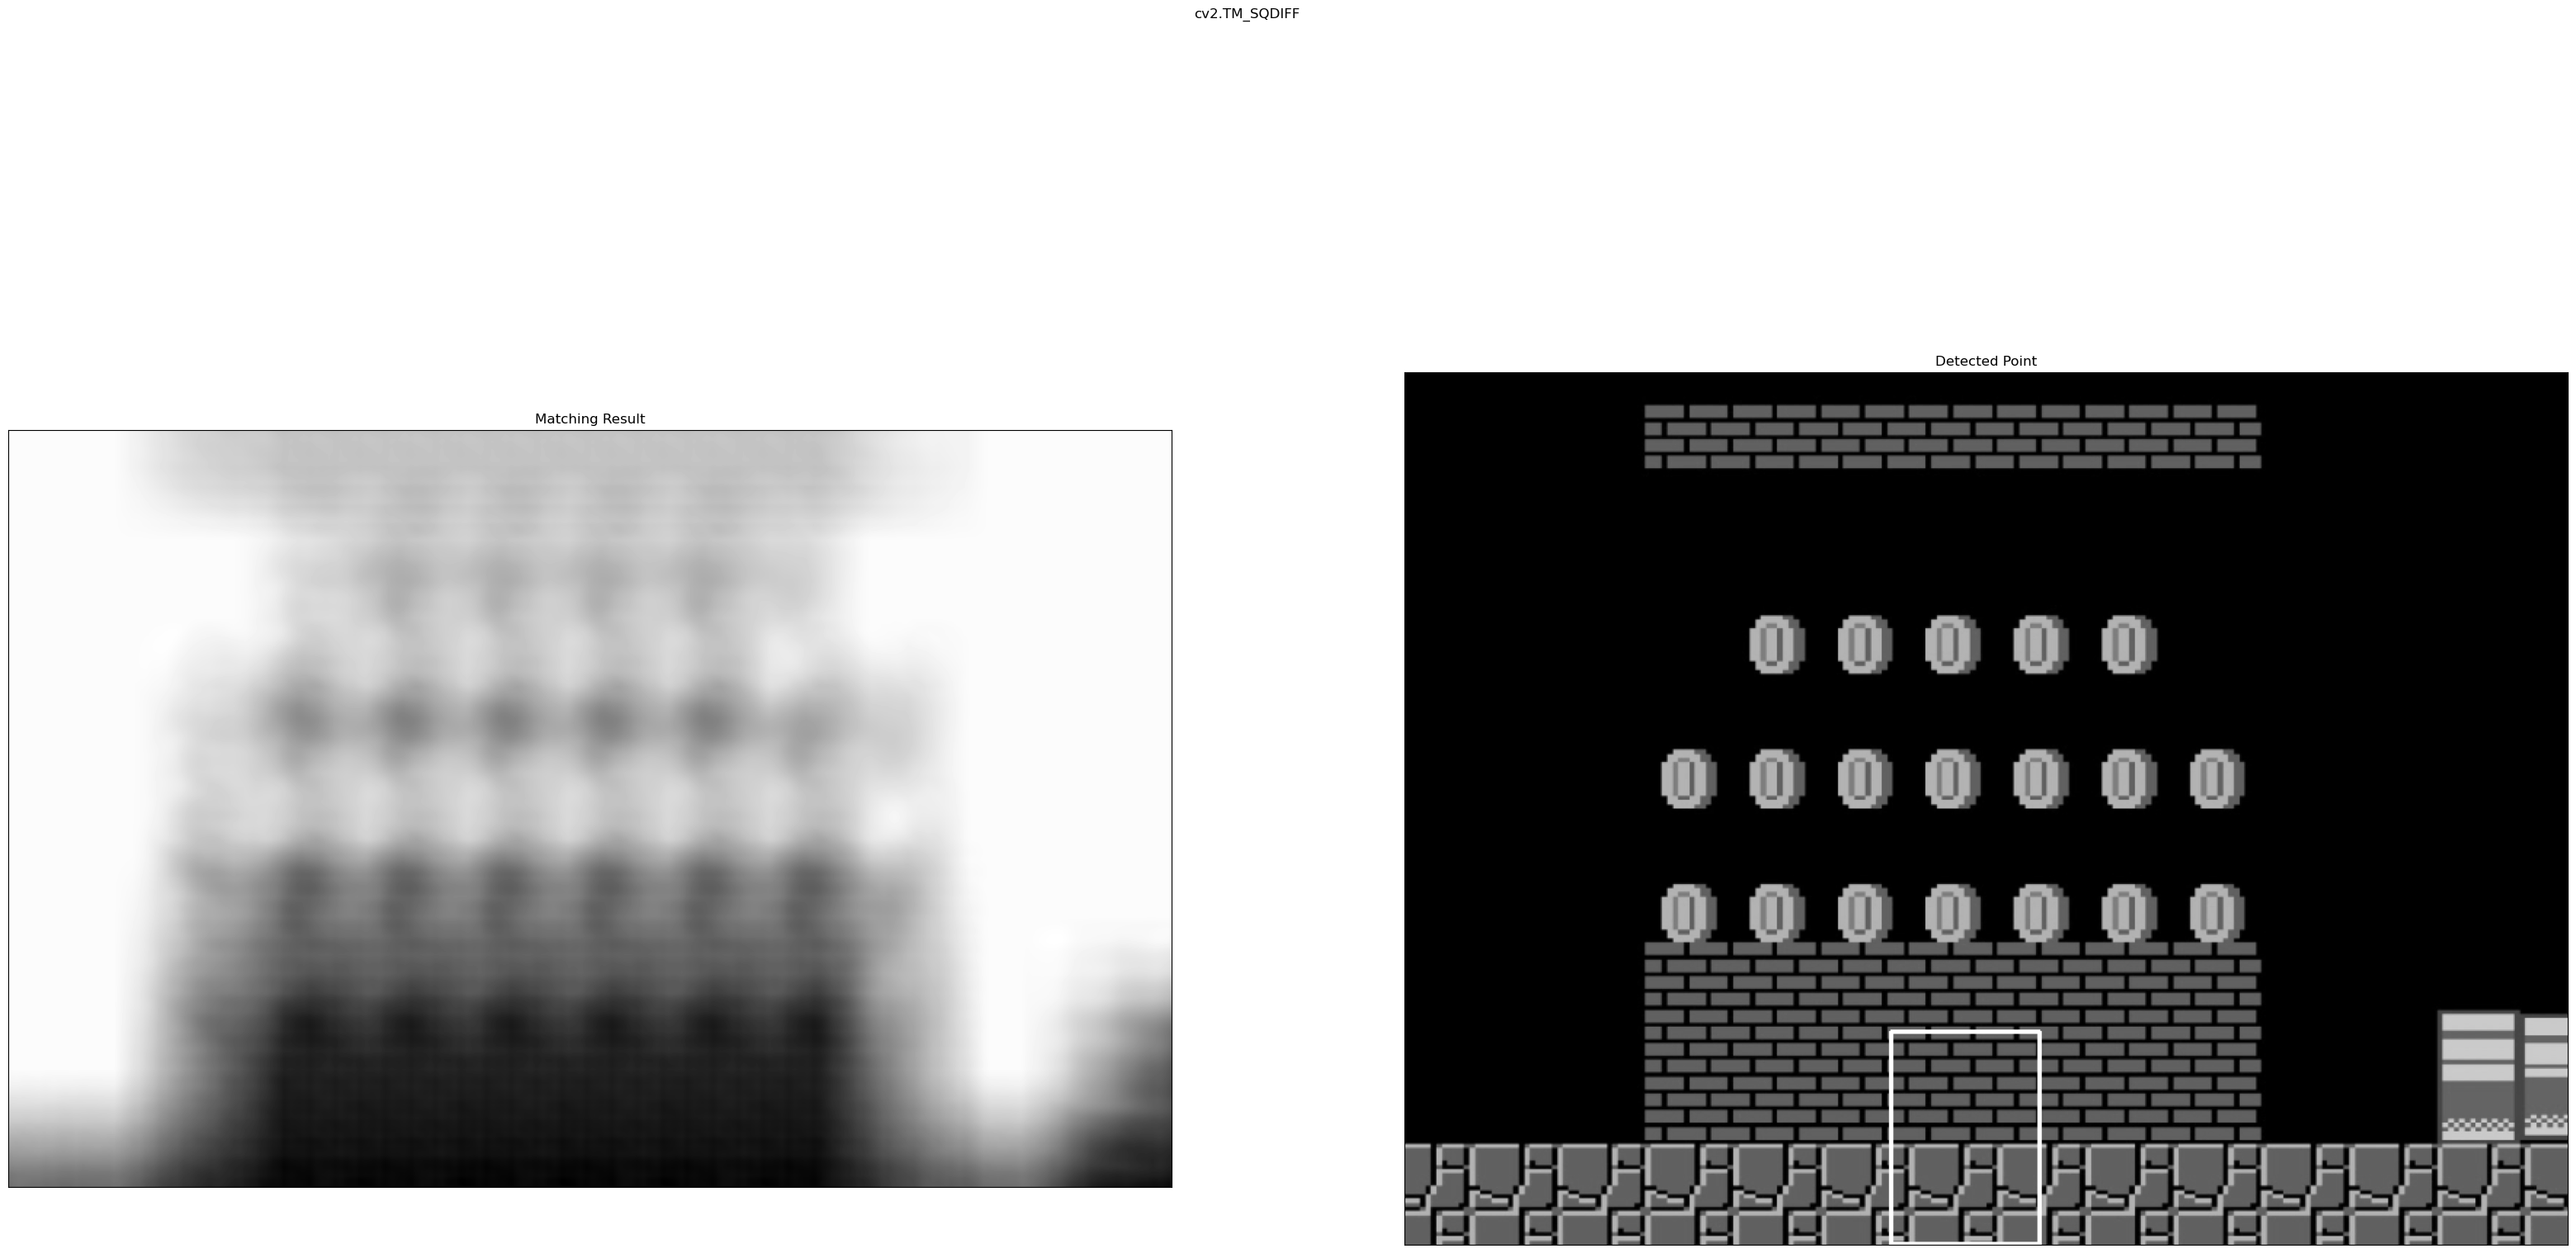

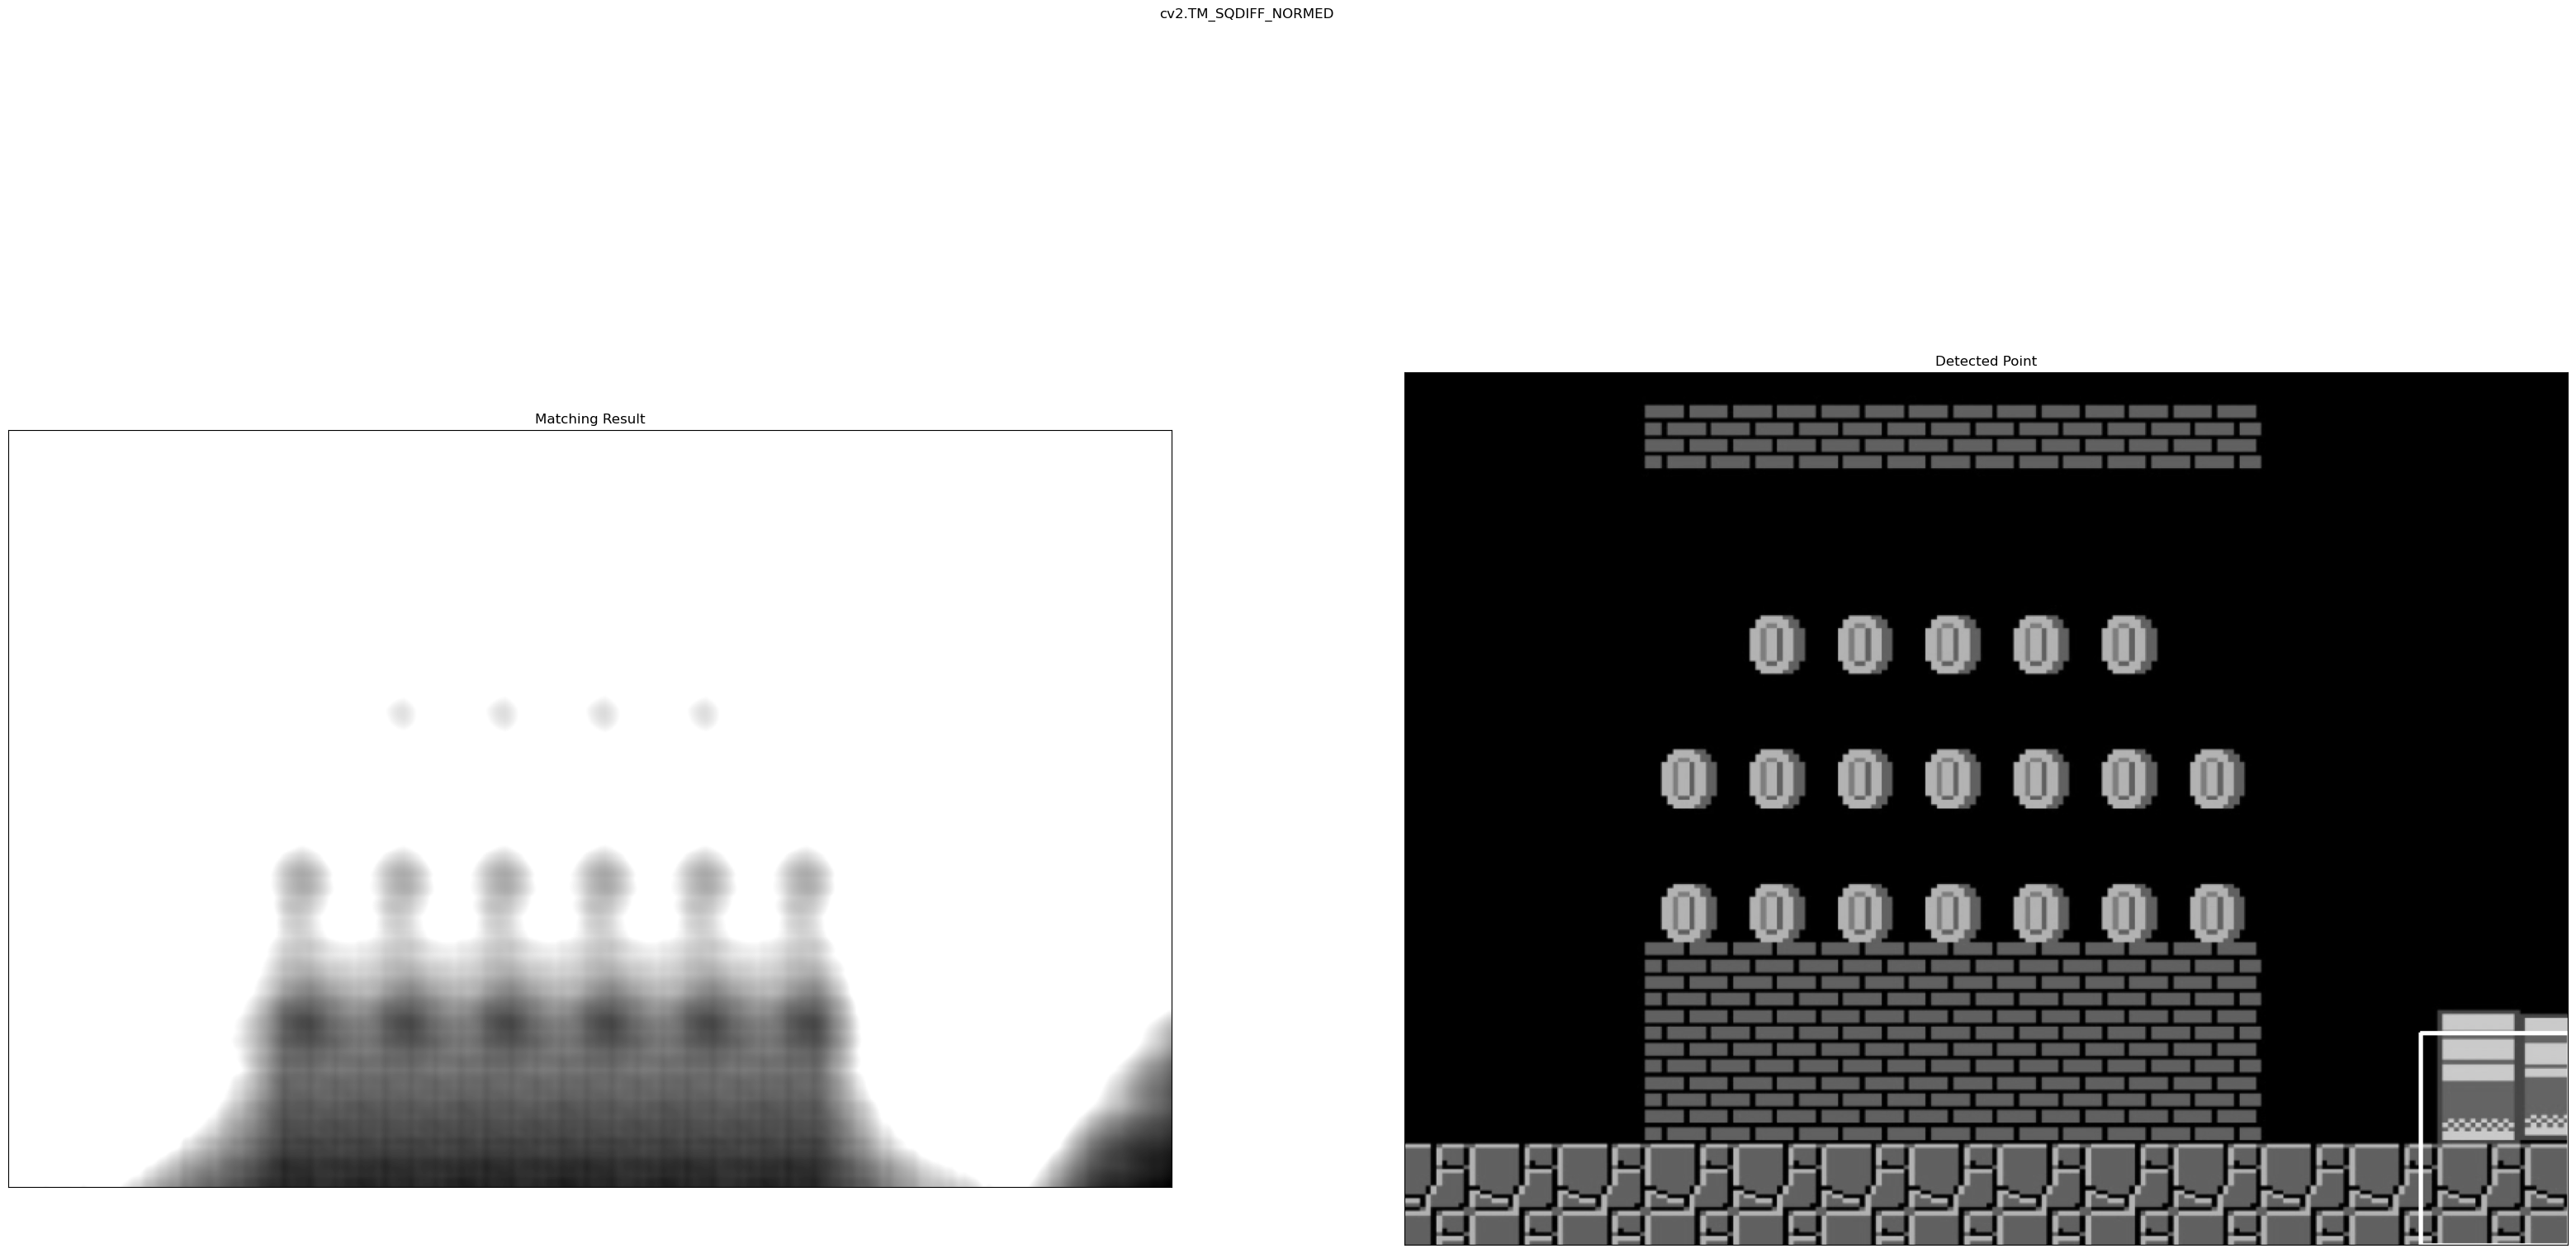

In [100]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [101]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[162:162+50, 232:232+46]
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [103]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res.png',img_rgb)

True

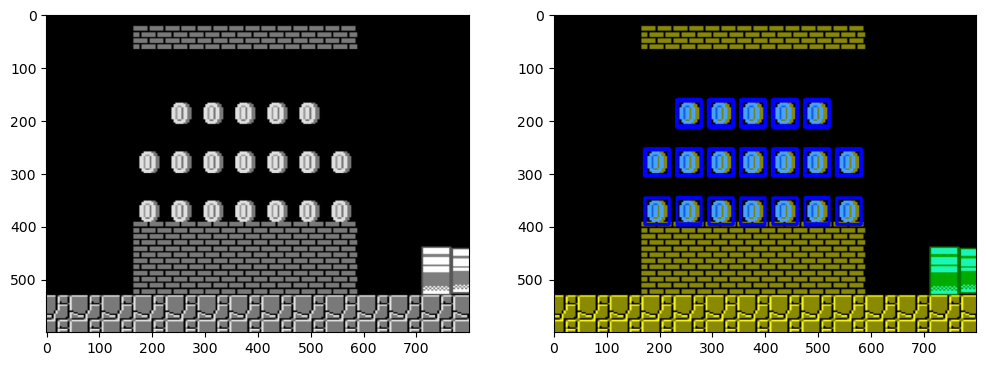

In [104]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(img_rgb)
plt.show()